# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

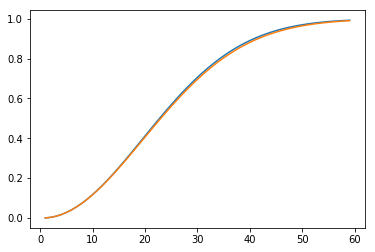

In [5]:
import math
import matplotlib.pyplot as plt

def fallingFactorial(d, n):
    prod = 1.0
    for i in range(0, n):
        prod *= (d - i)
    return prod

def p(n):
    return 1 - fallingFactorial(365, n)/365**n

def pa(n):
    return 1 - math.exp((-n * (n - 1.0)) / (2 * 365))

n = range(1,60)


plt.plot(n, [p(i) for i in n])
plt.plot(n, [pa(i) for i in n])
plt.show()


**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

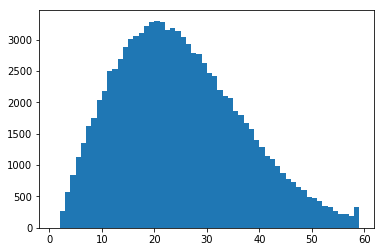

In [6]:
from random import randrange
import matplotlib.pyplot as plt

def first_repeat(d):
    person_set = set()
    
    rand = randrange(d)
    while rand not in person_set:
        person_set.add(rand)
        rand = randrange(d)
        
    return len(person_set) + 1

n = range(1, 100000)
results = [first_repeat(365) for i in n]
plt.hist(results, bins=range(1,60))
plt.show()

**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

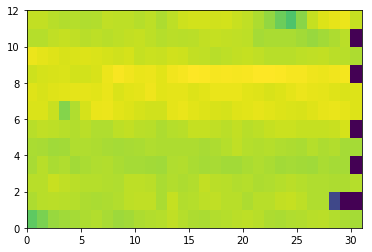

In [7]:
import numpy as np
import bisect
from matplotlib import pyplot
file = np.loadtxt('us_births_69_88.csv', skiprows=1, delimiter=',', dtype=int)

Matrix = [[0]*31 for i in range(12)]

for i in file:
    Matrix[i[0] - 1][i[1] - 1] = i[2]
        
pyplot.pcolor(Matrix)




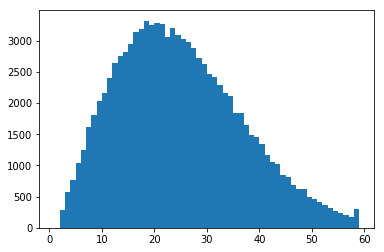

In [4]:
buckets = [0] * len(file)

sum = 0
for i in range(len(file)):
    sum += file[i][2]
    buckets[i] = sum

def sample():
    date_set = set()
    
    rand = bisect.bisect_left(buckets, randrange(sum))
    while rand not in date_set:
        date_set.add(rand)
        rand = bisect.bisect_left(buckets, randrange(sum))
        
    return len(date_set) + 1
    
n = range(1, 100000)
pyplot.hist([sample() for i in n], bins=range(1,60))
pyplot.show()